# Generation of the simulation 

### News :
- adaptative dt
- begin to the (2nd) stable equilibrium
- different variability
- different collapse (collapse proba and collapse proba per time unit)
- different application to the variability

In [1]:
import time as tm
import colorsys
import pickle # package use to save data

exec(open("solver2.py").read(), globals())
exec(open("param.py").read(), globals())

In [2]:
def exemples(name, Number_of_simulation = 100, mean = True, **kwargs):
    name = name+"_freq="+str(kwargs["Fire_param"]["param_freq"]["p"])+".png"
    O = Ode(**kwargs)
    Y = O.solve_by_part()
    O.plot_time_series(save = True, name = name, generation = True, show = False)
    return Y

In [3]:
def param_study(Number_of_simulation, numbreDePoint, Freq, Param_phy, Init, finalTime, alpha, beta, strength, name):
   # Color = ["blue", "g", "red", "orange", "pink", "black", "magenta", "grey"]
    Param_coupled = {"alpha":alpha,
                     "beta":beta}
    Param_freq = {"p":-1} # going to change
    Param_strength = {"scale":strength}
    Fire_param = {"model": "coupled",
                    "frequence": "bernoulli",
                    "param_freq" : Param_freq,
                    "amplitude": "exponential",
                    "Param_strength" : Param_strength,
                    "Param_coupled" : Param_coupled,
                    "type" : "proportionnal",
                    "coef_W_N" : 5}


    # Initialization of arrays
    Collapse_proba = np.zeros((numbreDePoint, len(Freq)))
    Collapse_proba_per_time_unit = np.zeros_like(Collapse_proba)

    Variability_always_N = np.zeros_like(Collapse_proba)
    Variability_until_N = np.zeros_like(Collapse_proba)
    Variability_10_N = np.zeros_like(Collapse_proba)
    Variability_only_N = np.zeros_like(Collapse_proba)
    Variability_tr10_N = np.zeros_like(Collapse_proba)
    Variability_tr0_N = np.zeros_like(Collapse_proba)
    
    Variability_always_W = np.zeros_like(Collapse_proba)
    Variability_until_W = np.zeros_like(Collapse_proba)
    Variability_10_W = np.zeros_like(Collapse_proba)
    Variability_only_W = np.zeros_like(Collapse_proba)
    Variability_tr10_W = np.zeros_like(Collapse_proba)
    Variability_tr0_W = np.zeros_like(Collapse_proba)
    
    Variability_always_NW = np.zeros_like(Collapse_proba)
    Variability_until_NW = np.zeros_like(Collapse_proba)
    Variability_10_NW = np.zeros_like(Collapse_proba)
    Variability_only_NW = np.zeros_like(Collapse_proba)
    Variability_tr10_NW = np.zeros_like(Collapse_proba)
    Variability_tr0_NW = np.zeros_like(Collapse_proba)
    
    #Exemples = np.zeros(len(Freq))
    
    for i, freq in enumerate(Freq):
        Param_freq = {"p":freq}
        Fire_param["param_freq"] = Param_freq
        dt = min(0.1, 0.1/freq)
        #Init = [1, Param_phy[1]]
        exemples(name = name, Number_of_simulation = Number_of_simulation, mean = False, finalTime = finalTime, Fire_param = Fire_param, dt = dt, Param_phy=Param_phy, Init=Init)
        for j in range(numbreDePoint):
            S = Solver(numberOfSimulation=Number_of_simulation, model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
            S.run()
            Collapse_proba[j,i] = S.collapse_proba()
            Collapse_proba_per_time_unit[j,i] = S.collapse_proba_per_time_unit()

            Variability_always_N[j,i] = S.variability_always(applicant="N")
            Variability_until_N[j,i] = S.variability_until(applicant="N")
            Variability_10_N[j,i] = S.variability_10(applicant="N")
            Variability_only_N[j,i] = S.variability_only(applicant="N")
            Variability_tr10_N[j,i] = S.variability_tr10(applicant="N")
            Variability_tr0_N[j,i] = S.variability_tr0(applicant="N")
            
            Variability_always_W[j,i] = S.variability_always(applicant="W")
            Variability_until_W[j,i] = S.variability_until(applicant="W")
            Variability_10_W[j,i] = S.variability_10(applicant="W")
            Variability_only_W[j,i] = S.variability_only(applicant="W")
            Variability_tr10_W[j,i] = S.variability_tr10(applicant="W")
            Variability_tr0_W[j,i] = S.variability_tr0(applicant="W")
            
            Variability_always_NW[j,i] = S.variability_always(applicant="N+W")
            Variability_until_NW[j,i] = S.variability_until(applicant="N+W")
            Variability_10_NW[j,i] = S.variability_10(applicant="N+W")
            Variability_only_NW[j,i] = S.variability_only(applicant="N+W")
            Variability_tr10_NW[j,i] = S.variability_tr10(applicant="N+W")
            Variability_tr0_NW[j,i] = S.variability_tr0(applicant="N+W")
            
           # print("\nTime solve init", t05-t0)
            #print("Time solver ", t1-t05)
            #print("Time collapse ", t2-t1)
            #print("Time variability ", t3-t2)
            
    Measures = {"Collapse_proba": Collapse_proba,
                "Collapse_proba_per_time_unit": Collapse_proba_per_time_unit, 
                
                "Variability_always_N": Variability_always_N, 
                "Variability_until_N":Variability_until_N,
                "Variability_10_N":Variability_10_N,
                "Variability_only_N":Variability_only_N,
                "Variability_tr10_N": Variability_tr10_N,
                "Variability_tr0_N": Variability_tr0_N,
                
                "Variability_always_W": Variability_always_W, 
                "Variability_until_W":Variability_until_W,
                "Variability_10_W":Variability_10_W,
                "Variability_only_W":Variability_only_W,
                "Variability_tr10_W": Variability_tr10_W,
                "Variability_tr0_W": Variability_tr0_W,
                
                "Variability_always_NW": Variability_always_NW, 
                "Variability_until_NW":Variability_until_NW,
                "Variability_10_NW":Variability_10_NW,
                "Variability_only_NW":Variability_only_NW,
                "Variability_tr10_NW": Variability_tr10_NW,
                "Variability_tr0_NW": Variability_tr0_NW              
               }
    
    # save data
    pickle_out = open(name+".txt","wb")
    pickle.dump(Measures, pickle_out)
    pickle_out.close()
    
    return

### should end at 18h

Time at the lunch of the simulation : 
 Sat Apr 20 15:09:56 2019 , Figure  0 (total  13230 )
Sat Apr 20 15:14:22 2019 , Figure  15 (total  13230 )
Sat Apr 20 15:18:46 2019 , Figure  30 (total  13230 )
Sat Apr 20 15:23:10 2019 , Figure  45 (total  13230 )
Sat Apr 20 15:27:37 2019 , Figure  60 (total  13230 )
Sat Apr 20 15:32:04 2019 , Figure  75 (total  13230 )
Sat Apr 20 15:36:34 2019 , Figure  90 (total  13230 )
Sat Apr 20 15:40:59 2019 , Figure  105 (total  13230 )
Sat Apr 20 15:45:22 2019 , Figure  120 (total  13230 )
Sat Apr 20 15:49:44 2019 , Figure  135 (total  13230 )
Sat Apr 20 15:54:06 2019 , Figure  150 (total  13230 )
Sat Apr 20 15:58:29 2019 , Figure  165 (total  13230 )
Sat Apr 20 16:02:54 2019 , Figure  180 (total  13230 )
Sat Apr 20 16:07:16 2019 , Figure  195 (total  13230 )
Sat Apr 20 16:11:39 2019 , Figure  210 (total  13230 )
Sat Apr 20 16:16:02 2019 , Figure  225 (total  13230 )
Sat Apr 20 16:20:25 2019 , Figure  240 (total  13230 )
Sat Apr 20 16:24:48 2019 , Figure

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:136: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:184: RuntimeWarning: Mean of empty slice
C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:202: RuntimeWarning: Mean of empty slice


Sat Apr 20 22:17:12 2019 , Figure  1455 (total  13230 )
Sat Apr 20 22:21:37 2019 , Figure  1470 (total  13230 )
Sat Apr 20 22:26:02 2019 , Figure  1485 (total  13230 )
Sat Apr 20 22:30:26 2019 , Figure  1500 (total  13230 )
Sat Apr 20 22:34:51 2019 , Figure  1515 (total  13230 )
Sat Apr 20 22:39:16 2019 , Figure  1530 (total  13230 )


C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:185: RuntimeWarning: Mean of empty slice


Sat Apr 20 22:43:40 2019 , Figure  1545 (total  13230 )
Sat Apr 20 22:48:04 2019 , Figure  1560 (total  13230 )
Sat Apr 20 22:52:28 2019 , Figure  1575 (total  13230 )
Sat Apr 20 22:56:53 2019 , Figure  1590 (total  13230 )
Sat Apr 20 23:01:17 2019 , Figure  1605 (total  13230 )
Sat Apr 20 23:05:42 2019 , Figure  1620 (total  13230 )
Sat Apr 20 23:10:06 2019 , Figure  1635 (total  13230 )
Sat Apr 20 23:14:31 2019 , Figure  1650 (total  13230 )
Sat Apr 20 23:18:56 2019 , Figure  1665 (total  13230 )
Sat Apr 20 23:23:20 2019 , Figure  1680 (total  13230 )
Sat Apr 20 23:27:44 2019 , Figure  1695 (total  13230 )
Sat Apr 20 23:32:09 2019 , Figure  1710 (total  13230 )
Sat Apr 20 23:36:32 2019 , Figure  1725 (total  13230 )
Sat Apr 20 23:40:57 2019 , Figure  1740 (total  13230 )
Sat Apr 20 23:45:21 2019 , Figure  1755 (total  13230 )
Sat Apr 20 23:49:46 2019 , Figure  1770 (total  13230 )
Sat Apr 20 23:54:12 2019 , Figure  1785 (total  13230 )
Sat Apr 20 23:58:36 2019 , Figure  1800 (total  

C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:484: RuntimeWarning: invalid value encountered in less
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\jerome\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Sun Apr 21 09:19:50 2019 , Figure  3705 (total  13230 )


C:\Users\jerome\Anaconda3\lib\site-packages\ipykernel_launcher.py:203: RuntimeWarning: Mean of empty slice


Sun Apr 21 09:24:16 2019 , Figure  3720 (total  13230 )
Sun Apr 21 09:28:41 2019 , Figure  3735 (total  13230 )
Sun Apr 21 09:33:07 2019 , Figure  3750 (total  13230 )
Sun Apr 21 09:37:33 2019 , Figure  3765 (total  13230 )
Sun Apr 21 09:42:00 2019 , Figure  3780 (total  13230 )
Sun Apr 21 09:46:25 2019 , Figure  3795 (total  13230 )
Sun Apr 21 09:50:50 2019 , Figure  3810 (total  13230 )
Sun Apr 21 09:55:15 2019 , Figure  3825 (total  13230 )
Sun Apr 21 09:59:40 2019 , Figure  3840 (total  13230 )
Sun Apr 21 10:04:06 2019 , Figure  3855 (total  13230 )
Sun Apr 21 10:08:31 2019 , Figure  3870 (total  13230 )
Sun Apr 21 10:12:56 2019 , Figure  3885 (total  13230 )
Sun Apr 21 10:17:21 2019 , Figure  3900 (total  13230 )
Sun Apr 21 10:21:46 2019 , Figure  3915 (total  13230 )
Sun Apr 21 10:26:10 2019 , Figure  3930 (total  13230 )
Sun Apr 21 10:30:36 2019 , Figure  3945 (total  13230 )
Sun Apr 21 10:35:02 2019 , Figure  3960 (total  13230 )
Sun Apr 21 10:39:26 2019 , Figure  3975 (total  

Sun Apr 21 20:14:26 2019 , Figure  5925 (total  13230 )
Sun Apr 21 20:18:51 2019 , Figure  5940 (total  13230 )
Sun Apr 21 20:23:16 2019 , Figure  5955 (total  13230 )
Sun Apr 21 20:27:41 2019 , Figure  5970 (total  13230 )
Sun Apr 21 20:32:07 2019 , Figure  5985 (total  13230 )
Sun Apr 21 20:36:34 2019 , Figure  6000 (total  13230 )
Sun Apr 21 20:40:58 2019 , Figure  6015 (total  13230 )
Sun Apr 21 20:45:24 2019 , Figure  6030 (total  13230 )
Sun Apr 21 20:49:50 2019 , Figure  6045 (total  13230 )
Sun Apr 21 20:54:15 2019 , Figure  6060 (total  13230 )
Sun Apr 21 20:58:41 2019 , Figure  6075 (total  13230 )
Sun Apr 21 21:03:07 2019 , Figure  6090 (total  13230 )
Sun Apr 21 21:07:33 2019 , Figure  6105 (total  13230 )
Sun Apr 21 21:11:58 2019 , Figure  6120 (total  13230 )
Sun Apr 21 21:16:23 2019 , Figure  6135 (total  13230 )
Sun Apr 21 21:20:48 2019 , Figure  6150 (total  13230 )
Sun Apr 21 21:25:13 2019 , Figure  6165 (total  13230 )
Sun Apr 21 21:29:38 2019 , Figure  6180 (total  

Mon Apr 22 07:05:04 2019 , Figure  8130 (total  13230 )
Mon Apr 22 07:09:30 2019 , Figure  8145 (total  13230 )
Mon Apr 22 07:13:56 2019 , Figure  8160 (total  13230 )
Mon Apr 22 07:18:23 2019 , Figure  8175 (total  13230 )
Mon Apr 22 07:22:48 2019 , Figure  8190 (total  13230 )
Mon Apr 22 07:27:14 2019 , Figure  8205 (total  13230 )
Mon Apr 22 07:31:40 2019 , Figure  8220 (total  13230 )
Mon Apr 22 07:36:06 2019 , Figure  8235 (total  13230 )
Mon Apr 22 07:40:31 2019 , Figure  8250 (total  13230 )
Mon Apr 22 07:44:57 2019 , Figure  8265 (total  13230 )
Mon Apr 22 07:49:23 2019 , Figure  8280 (total  13230 )
Mon Apr 22 07:53:48 2019 , Figure  8295 (total  13230 )
Mon Apr 22 07:58:14 2019 , Figure  8310 (total  13230 )
Mon Apr 22 08:02:40 2019 , Figure  8325 (total  13230 )
Mon Apr 22 08:07:07 2019 , Figure  8340 (total  13230 )
Mon Apr 22 08:11:33 2019 , Figure  8355 (total  13230 )
Mon Apr 22 08:15:59 2019 , Figure  8370 (total  13230 )
Mon Apr 22 08:20:24 2019 , Figure  8385 (total  

Mon Apr 22 17:51:41 2019 , Figure  10320 (total  13230 )
Mon Apr 22 17:56:08 2019 , Figure  10335 (total  13230 )
Mon Apr 22 18:00:35 2019 , Figure  10350 (total  13230 )
Mon Apr 22 18:05:00 2019 , Figure  10365 (total  13230 )
Mon Apr 22 18:09:26 2019 , Figure  10380 (total  13230 )
Mon Apr 22 18:13:52 2019 , Figure  10395 (total  13230 )
Mon Apr 22 18:18:17 2019 , Figure  10410 (total  13230 )
Mon Apr 22 18:22:43 2019 , Figure  10425 (total  13230 )
Mon Apr 22 18:27:09 2019 , Figure  10440 (total  13230 )
Mon Apr 22 18:31:33 2019 , Figure  10455 (total  13230 )
Mon Apr 22 18:35:59 2019 , Figure  10470 (total  13230 )
Mon Apr 22 18:40:23 2019 , Figure  10485 (total  13230 )
Mon Apr 22 18:44:48 2019 , Figure  10500 (total  13230 )
Mon Apr 22 18:49:12 2019 , Figure  10515 (total  13230 )
Mon Apr 22 18:53:38 2019 , Figure  10530 (total  13230 )
Mon Apr 22 18:58:03 2019 , Figure  10545 (total  13230 )
Mon Apr 22 19:02:30 2019 , Figure  10560 (total  13230 )
Mon Apr 22 19:06:56 2019 , Figu

Tue Apr 23 04:28:47 2019 , Figure  12480 (total  13230 )
Tue Apr 23 04:33:13 2019 , Figure  12495 (total  13230 )
Tue Apr 23 04:37:39 2019 , Figure  12510 (total  13230 )
Tue Apr 23 04:42:04 2019 , Figure  12525 (total  13230 )
Tue Apr 23 04:46:28 2019 , Figure  12540 (total  13230 )
Tue Apr 23 04:50:53 2019 , Figure  12555 (total  13230 )
Tue Apr 23 04:55:18 2019 , Figure  12570 (total  13230 )
Tue Apr 23 04:59:42 2019 , Figure  12585 (total  13230 )
Tue Apr 23 05:04:08 2019 , Figure  12600 (total  13230 )
Tue Apr 23 05:08:34 2019 , Figure  12615 (total  13230 )
Tue Apr 23 05:12:58 2019 , Figure  12630 (total  13230 )
Tue Apr 23 05:17:22 2019 , Figure  12645 (total  13230 )
Tue Apr 23 05:21:47 2019 , Figure  12660 (total  13230 )
Tue Apr 23 05:26:12 2019 , Figure  12675 (total  13230 )
Tue Apr 23 05:30:36 2019 , Figure  12690 (total  13230 )
Tue Apr 23 05:35:00 2019 , Figure  12705 (total  13230 )
Tue Apr 23 05:39:25 2019 , Figure  12720 (total  13230 )
Tue Apr 23 05:43:48 2019 , Figu

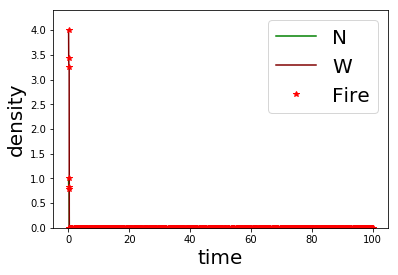

In [4]:
nomberFigure = len(N0)*len(W0)*len(FinalTime)*len(A)*len(M)*len(Alpha)*len(Beta)*len(Strength)
fig_by_loop = len(Freq) + 1

c=0
print("Time at the lunch of the simulation : \n", tm.ctime(), ", Figure ", c*fig_by_loop, "(total ", fig_by_loop*nomberFigure, ")") # afficher l'heure
for n0 in N0:
    for w0 in W0:
        Init = [n0, w0]
        for finalTime in FinalTime:
            for a in A:
                for m in M:
                    Param_phy = [a, m]
                    Init = [1., Param_phy[1]]
                    for strength in Strength:
                        for alpha in Alpha:
                            for beta in Beta:
                                name = DOSSIER+"n0="+str(Init[0])+"_w0="+str(Init[1])+"_final_time="+str(finalTime)+"_a="+str(a)+"_m="+str(m)+"_strength="+str(strength)+"_alpha="+str(alpha)+"_beta="+str(beta)
                                param_study(Number_of_simulation, numbreDePoint, Freq, Param_phy, Init, finalTime, alpha, beta, strength, name)           
                                c+=1
                                print(tm.ctime(), ", Figure ", c*fig_by_loop, "(total ", fig_by_loop*nomberFigure, ")") # afficher l'heure